In [1]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
#Loading the new file with all weekend markets

In [3]:
#Extracting the stadtteils with high market_count

In [4]:

# File path
file_path = '/home/zmaw/u301871/Documents/project-version-2/final_data_file_without_art_score.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Filter rows where 'market_count' is more than 1
filtered_df = df[df['market_count'] > 1]

# Export the filtered DataFrame to a new CSV file
filtered_file_path = '/home/zmaw/u301871/Documents/project-version-2/Codes/stadtteils_data_with_more_than_1_market.csv'
filtered_df.to_csv(filtered_file_path, index=False)

# Display the extracted information
print(filtered_df)


          Stadtteils  Anzahl der Einwohner: innen  \
0   Hamburg-Altstadt                       3182.0   
4          St. Georg                      12318.0   
13      Wilhelmsburg                      52961.0   
16   Altona-Altstadt                      29661.0   
30        Eimsbüttel                      57875.0   
31        Rotherbaum                      17153.0   
32      Harvestehude                      17994.0   
35          Niendorf                      42184.0   
43        Winterhude                      58052.0   
48      Barmbek-Nord                      43222.0   
69         Rahlstedt                      96499.0   
71         Bergedorf                      36757.0   
83      Neuallermöhe                      23368.0   
84           Harburg                      27957.0   

    Anzahl der Kinder und Jugendlichen unter 18 Jahren  \
0                                               515.0    
4                                              1420.0    
13                            

In [5]:
file_path_new_file='/home/zmaw/u301871/Documents/project-version-2/Codes/stadtteils_data_with_more_than_1_market.csv'
df_new=pd.read_csv(file_path_new_file)
df_new
df_new['Stadtteils']

0     Hamburg-Altstadt
1            St. Georg
2         Wilhelmsburg
3      Altona-Altstadt
4           Eimsbüttel
5           Rotherbaum
6         Harvestehude
7             Niendorf
8           Winterhude
9         Barmbek-Nord
10           Rahlstedt
11           Bergedorf
12        Neuallermöhe
13             Harburg
Name: Stadtteils, dtype: object

In [6]:
#Display the median values : for counting percentage of conditions met for  each  stadtteil out of 39 variables

In [7]:

# Calculate median for each column, excluding the first column
column_median = df_new.iloc[:, 1:].median()

# Create a DataFrame to hold median values with column names
median_df = pd.DataFrame({'Column': column_median.index, 'Median': column_median.values})


# Save the median values to a new file
medians_file_path = '/home/zmaw/u301871/Documents/project-version-2/Codes/column_medians.csv'
median_df.to_csv(medians_file_path, index=False)

# Display the calculated median values
print("median values of each column (excluding the first column):")
print(median_df)


median values of each column (excluding the first column):
                                               Column         Median
0                         Anzahl der Einwohner: innen   33209.000000
1   Anzahl der Kinder und Jugendlichen unter 18 Ja...    5026.500000
2   Anteil Kinder und Jugendlicher unter 18 Jahren...      15.700000
3      Anzahl älterer Einwohner: innen über 64 Jahren    4707.500000
4   Anteil älterer Einwohner: innen über 64 Jahren...      13.650000
5                                Anzahl der Haushalte   18641.000000
6   Durch-schnittliche Anzahl der Personen je Haus...       1.700000
7                                       Fläche in km²       3.950000
8                             Einwohner: innen je km²    6514.500000
9   Sozial-versicherungs-pflichtig Beschäftigte am...   13959.000000
10  Anteil sozial-versicherungs-pflichtig Beschäft...      59.700000
11                            Anzahl der Arbeitslosen    1467.000000
12                             Anzahl der Wo

In [8]:

# File paths
file_path = '/home/zmaw/u301871/Documents/project-version-2/final_data_file_without_art_score.csv'
file_path_column_medians = '/home/zmaw/u301871/Documents/project-version-2/Codes/column_medians.csv'

# Load the CSV files into pandas DataFrames
df = pd.read_csv(file_path)
column_medians_df = pd.read_csv(file_path_column_medians)

# Extract the column names and corresponding medians
columns = column_medians_df['Column']
medians = column_medians_df['Median']

# Initialize a list to store the count of exceedances for each row
exceed_counts = []

# Iterate over each row in the original dataset
for index, row in df.iterrows():
    count = 0
    # Compare each value in the row with the corresponding median
    for col, median in zip(columns, medians):
        if row[col] > median:
            count += 1
    # Append the count of exceedances for the row to the list
    exceed_counts.append(count)

# Add the exceed counts as a new column to the original dataset
df['Exceed_Counts'] = exceed_counts

# Display the updated DataFrame
print(df)
df['Exceed_Counts']

            Stadtteils  Anzahl der Einwohner: innen  \
0     Hamburg-Altstadt                       3182.0   
1            HafenCity                       6950.0   
2             Neustadt                      12649.0   
3            St. Pauli                      22056.0   
4            St. Georg                      12318.0   
..                 ...                          ...   
94           Hausbruch                      16868.0   
95  Neugraben-Fischbek                      33963.0   
96             Francop                        736.0   
97          Neuenfelde                       5245.0   
98               Cranz                        810.0   

    Anzahl der Kinder und Jugendlichen unter 18 Jahren  \
0                                               515.0    
1                                              1386.0    
2                                              1412.0    
3                                              2941.0    
4                                              14

0      6
1     14
2     11
3     10
4     11
      ..
94    12
95    16
96    10
97     9
98     7
Name: Exceed_Counts, Length: 99, dtype: int64

In [9]:
#Calculation with 75th percentile

In [10]:
# Calculate the 75th percentile for each column, excluding the first column
column_75th_percentile = df_new.iloc[:, 1:].quantile(0.75)

# Create a DataFrame to hold the 75th percentile values with column names
percentile_75_df = pd.DataFrame({'Column': column_75th_percentile.index, '75th Percentile': column_75th_percentile.values})

# Save the 75th percentile values to a new file
percentiles_file_path = '/home/zmaw/u301871/Documents/project-version-2/Codes/column_75th_percentiles.csv'
percentile_75_df.to_csv(percentiles_file_path, index=False)

# Display the calculated 75th percentile values
print("75th percentile values of each column (excluding the first column):")
print(percentile_75_df)


75th percentile values of each column (excluding the first column):
                                               Column  75th Percentile
0                         Anzahl der Einwohner: innen     50526.250000
1   Anzahl der Kinder und Jugendlichen unter 18 Ja...      7216.500000
2   Anteil Kinder und Jugendlicher unter 18 Jahren...        17.425000
3      Anzahl älterer Einwohner: innen über 64 Jahren      7524.500000
4   Anteil älterer Einwohner: innen über 64 Jahren...        19.125000
5                                Anzahl der Haushalte     28765.000000
6   Durch-schnittliche Anzahl der Personen je Haus...         1.900000
7                                       Fläche in km²         9.700000
8                             Einwohner: innen je km²      8494.750000
9   Sozial-versicherungs-pflichtig Beschäftigte am...     22552.250000
10  Anteil sozial-versicherungs-pflichtig Beschäft...        62.650000
11                            Anzahl der Arbeitslosen      1695.000000
12       

In [11]:
#Calculating the  count out of all variables : exceeded

In [12]:

# File paths
file_path = '/home/zmaw/u301871/Documents/project-version-2/final_data_file_without_art_score.csv'
file_path_column_medians = '/home/zmaw/u301871/Documents/project-version-2/Codes/column_75th_percentiles.csv'

# Load the CSV files into pandas DataFrames
df_75 = pd.read_csv(file_path)
column_75_df = pd.read_csv(file_path_column_medians)

# Extract the column names and corresponding medians
columns = column_75_df['Column']
pctl_75 = column_75_df['75th Percentile']

# Initialize a list to store the count of exceedances for each row
exceed_counts = []

# Iterate over each row in the original dataset
for index, row in df_75.iterrows():
    count = 0
    # Compare each value in the row with the corresponding 75th percentile
    for col, pctl in zip(columns, pctl_75):
        if row[col] > pctl:
            count += 1
    # Append the count of exceedances for the row to the list
    exceed_counts.append(count)

# Add the exceed counts as a new column to the original dataset
df['Exceed_Counts_75th'] = exceed_counts

# Divide each exceed count by 39 and multiply by 100 to express it as a percentage
df_75['Exceed_Percentage_75th'] = (df['Exceed_Counts_75th'] / 39) * 100

# Display the updated DataFrame
print(df_75)


            Stadtteils  Anzahl der Einwohner: innen  \
0     Hamburg-Altstadt                       3182.0   
1            HafenCity                       6950.0   
2             Neustadt                      12649.0   
3            St. Pauli                      22056.0   
4            St. Georg                      12318.0   
..                 ...                          ...   
94           Hausbruch                      16868.0   
95  Neugraben-Fischbek                      33963.0   
96             Francop                        736.0   
97          Neuenfelde                       5245.0   
98               Cranz                        810.0   

    Anzahl der Kinder und Jugendlichen unter 18 Jahren  \
0                                               515.0    
1                                              1386.0    
2                                              1412.0    
3                                              2941.0    
4                                              14

In [13]:
df_75.columns

Index(['Stadtteils', 'Anzahl der Einwohner: innen',
       'Anzahl der Kinder und Jugendlichen unter 18 Jahren',
       'Anteil Kinder und Jugendlicher unter 18 Jahren an der Gesamt-bevölkerung',
       'Anzahl älterer Einwohner: innen über 64 Jahren',
       'Anteil älterer Einwohner: innen über 64 Jahren an der Gesamt-bevölkerung',
       'Anzahl der Haushalte',
       'Durch-schnittliche Anzahl der Personen je Haushalt', 'Fläche in km²',
       'Einwohner: innen je km²',
       'Sozial-versicherungs-pflichtig Beschäftigte am Wohnort',
       'Anteil sozial-versicherungs-pflichtig Beschäftigter am Wohnort an den Erwerbs-fähigen (15 bis unter 65-Jährige)',
       'Anzahl der Arbeitslosen', 'Anzahl der Wohngebäude',
       'Anzahl der Wohnungen', 'Durch-schnittliche Wohnungs-größe in m²',
       'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
       'Anzahl der Sozial-wohnungen',
       'Anteil der Sozial-wohnungen an allen Wohnungen',
       'Durch-schnittlicher Immobilien-prei

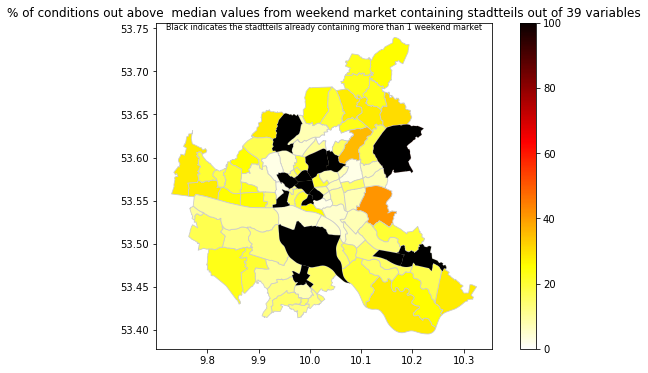

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = '/home/zmaw/u301871/Documents/project-version-2/Data/Shapefile_Final/Shapefile_Hamburg_final.shp'
gdf = gpd.read_file(shapefile_path)

# Merge shapefile with df_75 based on stadtteils column
merged_gdf = gdf.merge(df_75, left_on='stadtteil', right_on=df_75.columns[0])

# List of stadtteils to color black
black_stadtteils = ['Hamburg-Altstadt', 'St. Georg', 'Wilhelmsburg', 'Altona-Altstadt', 'Eimsbüttel',
                    'Rotherbaum', 'Harvestehude', 'Niendorf', 'Winterhude', 'Barmbek-Nord', 
                    'Rahlstedt', 'Bergedorf', 'Neuallermöhe', 'Harburg']

# Plot the 'Exceed_Percentage_75th' column values matched with the shapefile stadtteils
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='Exceed_Percentage_75th', cmap='hot_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,vmin=0,vmax=100)

# Color specific stadtteils black
for stadtteil in black_stadtteils:
    merged_gdf[merged_gdf['stadtteil'] == stadtteil].plot(ax=ax, color='black')

ax.set_title('% of conditions out above  median values from weekend market containing stadtteils out of 39 variables')
ax.text(0.5, 0.98, 'Black indicates the stadtteils already containing more than 1 weekend market', ha='center', fontsize=8, transform=ax.transAxes)
plt.show()


In [15]:
#Principle Component Analysis

In [16]:
import pandas as pd

# File paths
file_path = '/home/zmaw/u301871/Documents/project-version-2/final_data_file_without_art_score.csv'
file_path_column_medians = '/home/zmaw/u301871/Documents/project-version-2/Codes/column_75th_percentiles.csv'

# Load the CSV files into pandas DataFrames
df_75 = pd.read_csv(file_path)
column_75_df = pd.read_csv(file_path_column_medians)

# Specify the relevant variables for calculation
relevant_variables = [
    'Anzahl der Haushalte',
    'Sozial-versicherungs-pflichtig Beschäftigte am Wohnort',
    'Anzahl der Wohnungen',
    'Anzahl der Einpersonen-haushalte',
    'Gesamtbetrag der Einkünfte - [Steuerpflichtig]',
    'Anzahl der Wohnungen in Ein- und Zweifamilien-häusern',
    'distance_rathaus',
    'Anteil der Haushalte, in denen nur eine Person lebt, an allen Haushalten',
    'Durch-schnittliche Anzahl der Personen je Haushalt',
    'Anzahl der Wohngebäude',
    'Festgesetzte Einkommenssteuer/ Jahreslohnsteuer - [1000€]',
    'Gesamtbetrag Einkünfte Mittelwert - [€]',
    'Gesamtbetrag Einkünfte Median - [€]',
    'Durch-schnittliche Wohnfläche je Einwohner:in in m²',
    'Durch-schnittlicher Immobilien-preis für ein Grundstück in EUR/m²'
]

# Filter columns in df_75 and column_75_df to include only the relevant variables
df_75 = df_75[relevant_variables]
column_75_df = column_75_df[column_75_df['Column'].isin(relevant_variables)]

# Extract the column names and corresponding 75th percentiles
columns = column_75_df['Column']
pctl_75 = column_75_df['75th Percentile']

# Initialize a list to store the count of exceedances for each row
exceed_counts = []

# Iterate over each row in the original dataset
for index, row in df_75.iterrows():
    count = 0
    # Compare each value in the row with the corresponding 75th percentile
    for col, pctl in zip(columns, pctl_75):
        if row[col] > pctl:
            count += 1
    # Append the count of exceedances for the row to the list
    exceed_counts.append(count)

# Add the exceed counts as a new column to the original dataset
df_75['Exceed_Counts_75th'] = exceed_counts

# Divide each exceed count by the total number of variables and multiply by 100 to express it as a percentage
total_variables = len(relevant_variables)
df_75['Exceed_Percentage_75th'] = (df_75['Exceed_Counts_75th'] / 15) * 100

# Display the updated DataFrame
print(df_75)

    Anzahl der Haushalte  \
0                 1884.0   
1                 3183.0   
2                 8683.0   
3                14772.0   
4                 7720.0   
..                   ...   
94                7829.0   
95               15602.0   
96                 374.0   
97                2337.0   
98                 460.0   

    Sozial-versicherungs-pflichtig Beschäftigte am Wohnort  \
0                                              1346.0        
1                                              3087.0        
2                                              6350.0        
3                                              9903.0        
4                                              5424.0        
..                                                ...        
94                                             6492.0        
95                                            12746.0        
96                                                NaN        
97                                         